In [ ]:
### Evaluating Value Sets

## Distribution 1D - how symmetrical/normal are they?
## Distribution 2D - how correlated are they? Not just on average but across the 2d compass!

## Do they behave like the balance versions in besf2f? E.g. regression coefficients

## What do you want these value sets *for*?
    # predicting voting *behaviour*? or voting preferences (like/ptv?)





In [ ]:
################ different sets

# different waves on BES/all the waves

# previously create omni-wave sets

# BESf2f/BSA sets

In [1]:
%%time
dataset_name = "W25_comb"
df_list = "BES_Panel|BES_reduced_with_na"

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}

global BES_label_list, BES_df_list
BES_reduced_with_na.index=BES_Panel.index

Toggle code

var_type (10365, 13)
CPU times: total: 2min 36s
Wall time: 2min 49s


In [2]:
pan_dataset_allr_values = pd.read_pickle(BES_small_data_files + "pan_dataset_allr_valuesW19"+".zip",compression='zip')
# pan_dataset_allr_values = pan_dataset_allr_values.loc[BES_Panel.index].sort_index()
pan_dataset_ages = pd.read_pickle(BES_small_data_files + "pan_dataset_ages"+".zip", compression='zip')
pan_dataset_votes = pd.read_pickle(BES_small_data_files+"pan_dataset_votes"+".zip",compression='zip')

In [3]:
value_wt = dict()

value_wt[1] = "W1_W5"
value_wt[2] = "W1_W5"
value_wt[3] = "W1_W5"
value_wt[4] = "W1_W5"
value_wt[5] = "W1_W5"
value_wt[6] = "W6"
value_wt[7] = "W7_W9"
value_wt[8] = "W7_W9"
value_wt[9] = "W7_W9"
value_wt[10] = "W10_W12"
value_wt[11] = "W10_W12"
value_wt[12] = "W10_W12"
value_wt[13] = "W13"
value_wt[14] = "W14W15"
value_wt[15] = "W14W15"
value_wt[16] = "W16"
value_wt[17] = "W17_W19"
value_wt[18] = "W17_W19"
value_wt[19] = "W17_W19"
value_wt[20] = "W20"
value_wt[21] = "W21"
value_wt[22] = "W22"
value_wt[23] = "W23"
value_wt[24] = "W24"
value_wt[25] = "W25"


In [4]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pyreadr
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

fname = "bes2017"
bes2017 = pyreadr.read_r('E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_code\\'+\
                        'Correcting-Acquiescence-Unbalanced-Replication\\results\\'+fname+".RData")[fname]

fname = "bsa2017"
bsa2017 = pyreadr.read_r('E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_code\\'+\
                        'Correcting-Acquiescence-Unbalanced-Replication\\results\\'+fname+".RData")[fname]

bes2017["edlevel"] = bes2017["edlevel"].cat.reorder_categories([ 'No qualification', 'GCSE/equiv', 'A-level/equiv', 'Undergrad', 'Postgrad'])
bsa2017["edlevel"] = bsa2017["edlevel"].cat.reorder_categories([ 'No qualification', 'GCSE/equiv', 'A-level/equiv', 'Undergrad', 'Postgrad'])

def get_edlevel_coeffs(df):
    # got to have edlevel, lrScale, alScale, weight
    # edlevel in these cats this order [ 'No qualification', 'GCSE/equiv', 'A-level/equiv', 'Undergrad', 'Postgrad']
    
    output_df = pd.DataFrame(columns = ["lrScale","alScale"],
                             index = ['edlevel_GCSE/equiv', 'edlevel_A-level/equiv', 'edlevel_Undergrad',
                                      'edlevel_Postgrad', 'intercept'])
    
    for scale in output_df.columns:
    
        mask = df["edlevel"].notnull() & df[scale].notnull() & df["weight"].notnull()
        X = pd.get_dummies( df[["edlevel"]][mask] ).drop("edlevel_No qualification",axis=1).astype(float)
        X = X[[ 'edlevel_GCSE/equiv', 'edlevel_A-level/equiv', 'edlevel_Undergrad', 'edlevel_Postgrad',  ]]
        y = df[scale][mask]

        reg = LinearRegression(fit_intercept=True).fit( X , y ,sample_weight = df["weight"][mask])
        reg.score(X, y)
        temp = pd.Series(reg.coef_,index=X.columns)
        temp.loc["intercept"] = reg.intercept_
        output_df[scale] = temp

    return output_df

besip2017 = BES_Panel[["wt_new_W14",
           "lr1W14W15","lr2W14W15","lr3W14W15","lr4W14W15","lr5W14W15",
           "al1W14W15","al2W14W15","al3W14W15","al4W14W15","al5W14W15",
           "al_scaleW14W15","lr_scaleW14W15",
           "p_edlevelW14",
          ]]

besip2017 = besip2017.rename(columns={"wt_new_W14":"weight","p_edlevelW14":"edlevel",
                         "al_scaleW14W15":"alScale","lr_scaleW14W15":"lrScale",
                         "lr1W14W15":"lr1","lr2W14W15":"lr2","lr3W14W15":"lr3","lr4W14W15":"lr4","lr5W14W15":"lr5",
                         "al1W14W15":"al1","al2W14W15":"al2","al3W14W15":"al3","al4W14W15":"al4","al5W14W15":"al5",})

replace_dict = { 'No qualifications':"No qualification", 'Below GCSE':'GCSE/equiv', 'GCSE':'GCSE/equiv', 
                 'A-level':'A-level/equiv', 'Undergraduate':'Undergrad', 'Postgrad':'Postgrad' }
besip2017["edlevel"] = besip2017["edlevel"].astype('object').replace(replace_dict).astype('category')\
     .cat.reorder_categories( ['No qualification', 'GCSE/equiv', 'A-level/equiv', 'Undergrad', 'Postgrad'] )

besip2017[["al1","al2","al3","al4","al5", "lr1","lr2","lr3","lr4","lr5"]]=\
    besip2017[["al1","al2","al3","al4","al5", "lr1","lr2","lr3","lr4","lr5"]]\
    .apply(lambda x: x.replace("Don't know",np.nan).cat.codes.replace(-1,np.nan))

besip2017["alScale"] = besip2017["alScale"].cat.codes.replace(-1,np.nan)
besip2017["lrScale"] = besip2017["lrScale"].cat.codes.replace(-1,np.nan)

besip2017 = besip2017.dropna()

In [5]:
lr_scale = pan_dataset_allr_values["Economic: Left <-> Right{gaussian-ish}"]
al_scale = pan_dataset_allr_values["Social: Liberalism <-> Conservatism{gaussian-ish}"]

In [6]:
# output_df_dict[file_stub].to_pickle(BES_small_data_files+file_stub+".zip",compression='zip')

In [7]:
acq_items = ['euroW7','euroW8','aomW7','authLongW10','sdoDomAndAntiEgalW15','ethnoW10',
 'ethnoW7','ethnoW9','empathyW20','empathyW14','zeroSumW14']

wt_dict = {7:"wt_new_W7",8:"wt_new_W8",9:"wt_new_W9",10:"wt_new_W10",14:"wt_new_W14",15:"wt_new_W15",20:"wt_new_W20"}

results_df = pd.DataFrame(index=acq_items)

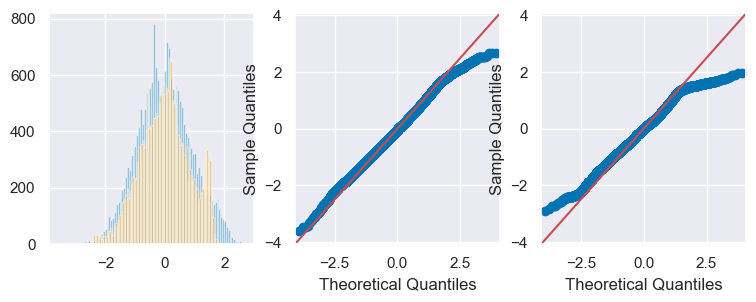

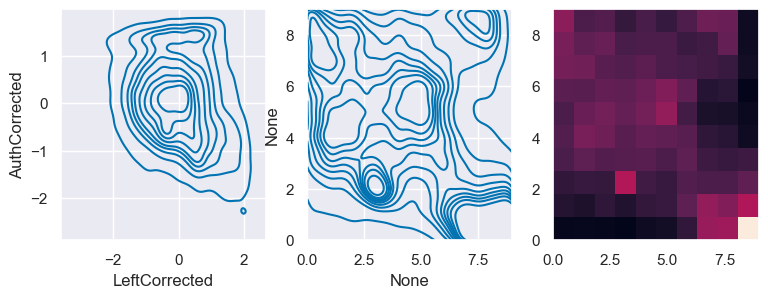

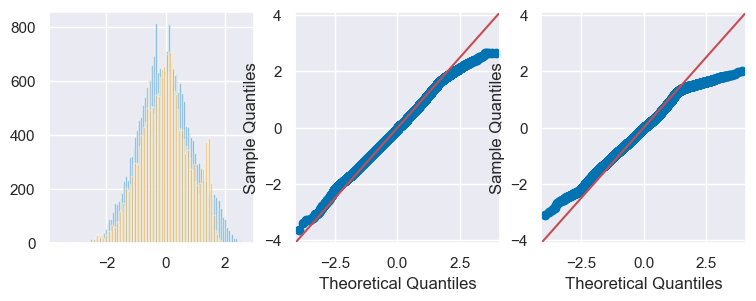

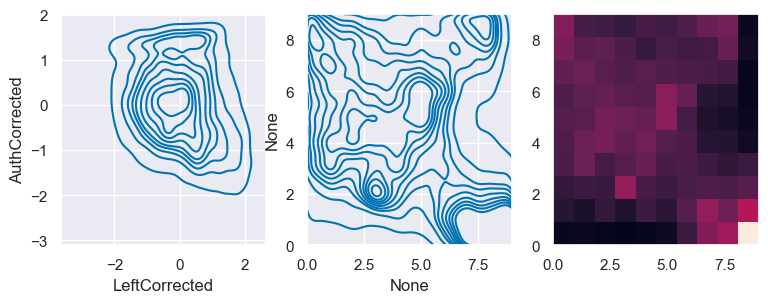

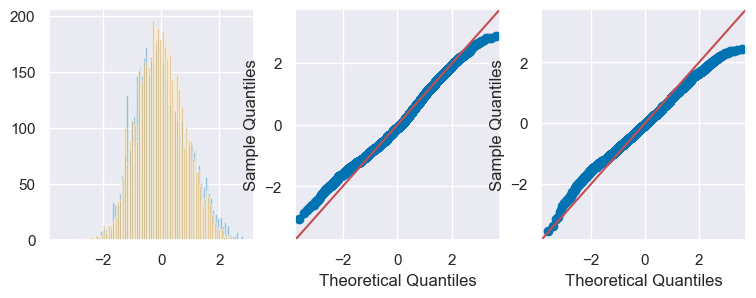

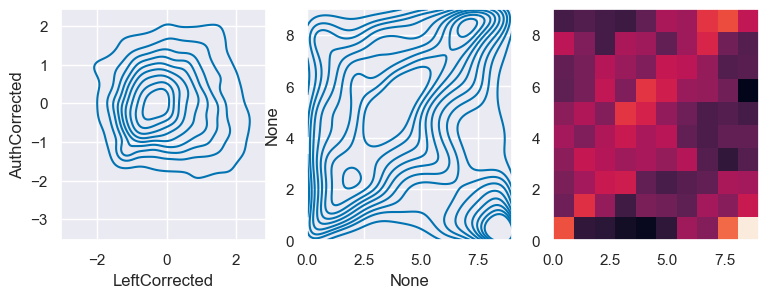

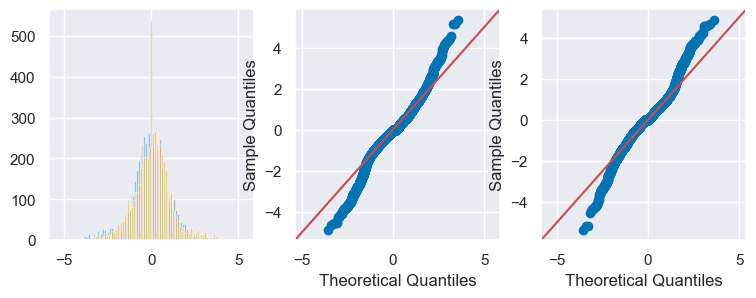

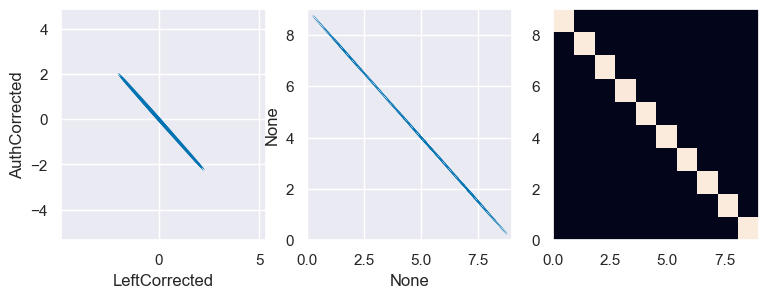

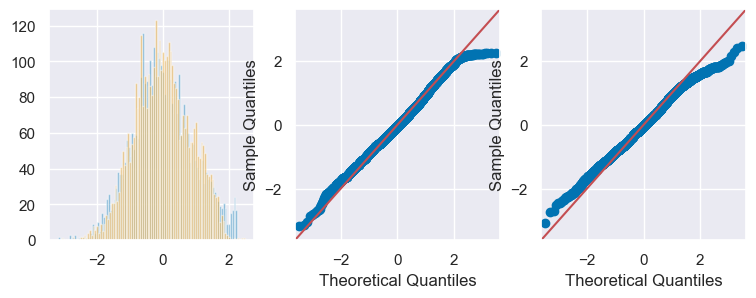

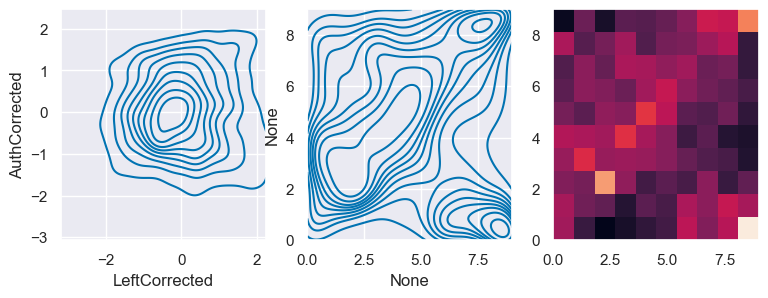

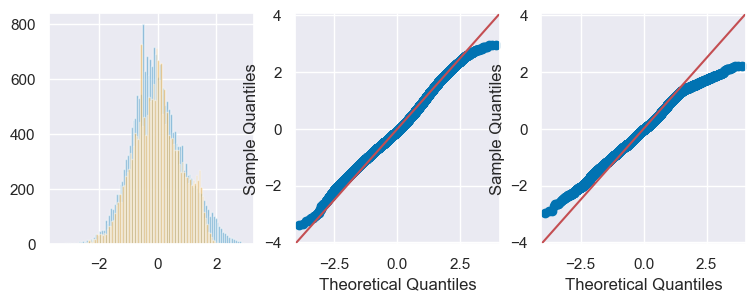

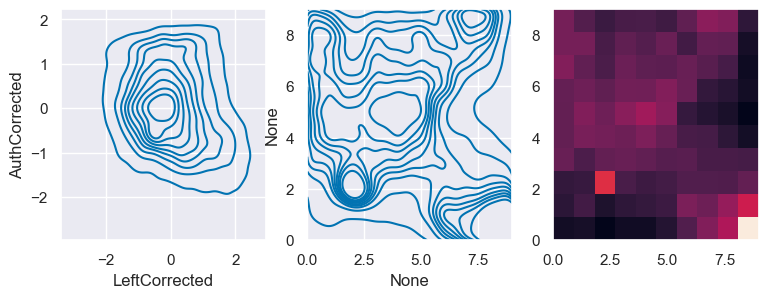

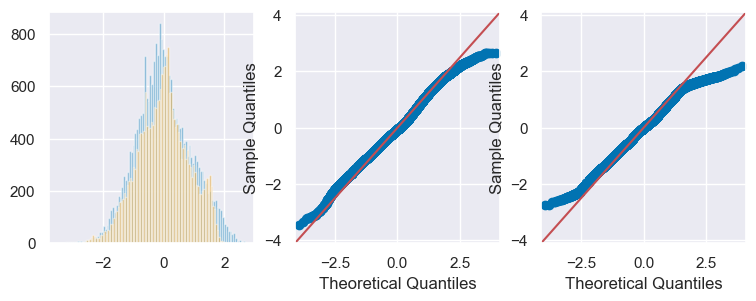

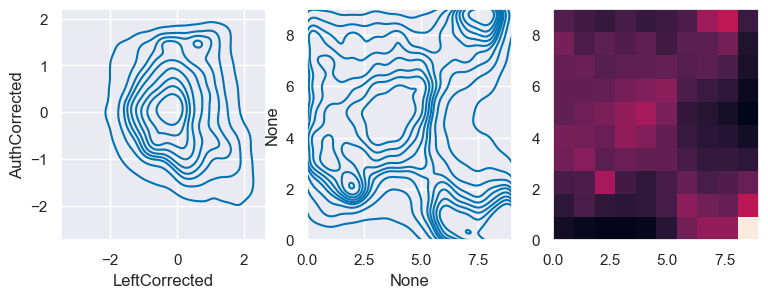

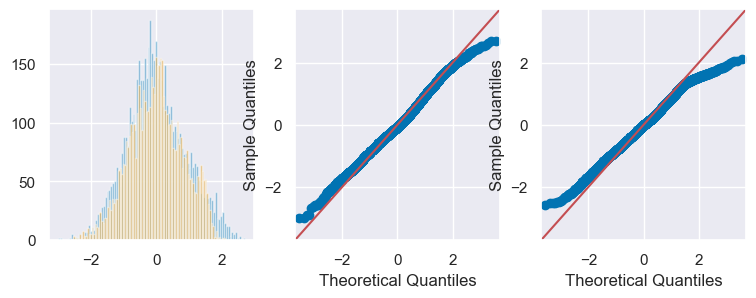

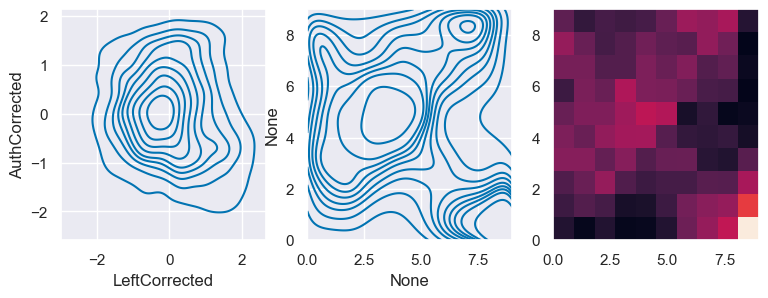

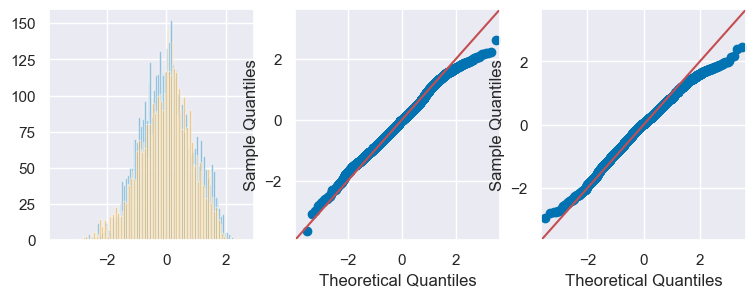

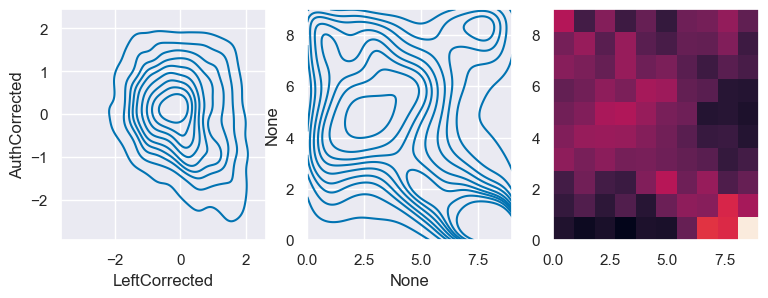

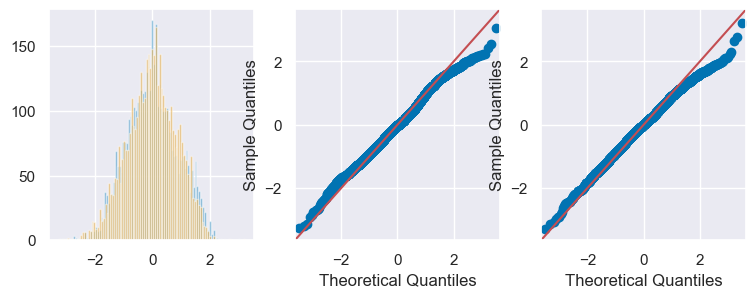

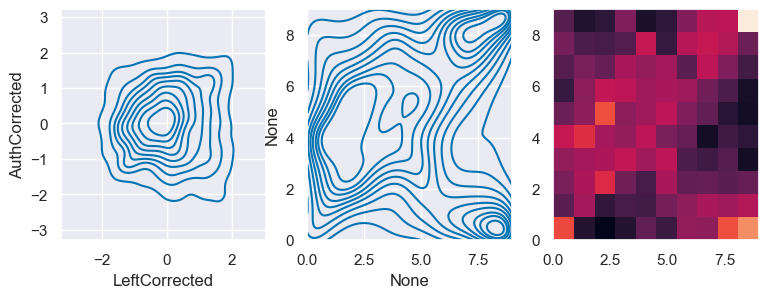

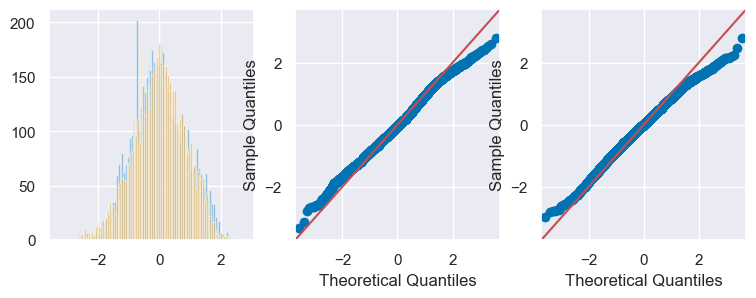

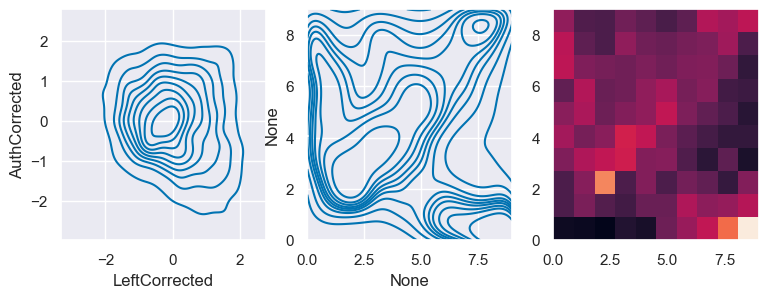

In [8]:
for value_set_name in acq_items:
    wave = int(value_set_name.split("W")[-1])
    value_set = pd.read_pickle( BES_small_data_files + value_set_name + ".zip")
    wt_var = wt_dict[wave]
    value_set["weight"] = BES_Panel.loc[value_set.index,wt_var]

    lr_scale = value_set["LeftCorrected"]
    al_scale = value_set["AuthCorrected"]

    value_set["lrScale"] = lr_scale
    value_set["alScale"] = al_scale
    
    fig, axs = plt.subplots(1, 3, figsize=(9, 3))
    lr_scale.hist(bins=100,alpha=.5,ax=axs[0]);
    al_scale.hist(bins=100,alpha=.5,ax=axs[0]);
    sm.qqplot(lr_scale, line='45', c='r',ax=axs[1]);
    sm.qqplot(al_scale, line='45', c='g',ax=axs[2]);
    
#     results_df.loc[value_set_name,"al_kstest_res"] = stats.kstest(al_scale, stats.norm.cdf)
    results_df.loc[value_set_name,"al_kstest_stat"] = stats.kstest(al_scale, stats.norm.cdf)[0]
#     results_df.loc[value_set_name,"lr_kstest_res"] = stats.kstest(lr_scale, stats.norm.cdf)
    results_df.loc[value_set_name,"lr_kstest_stat"] = stats.kstest(lr_scale, stats.norm.cdf)[0]  
    
    q = 10
    lr_scale_uniform = pd.qcut(lr_scale,q).cat.codes
    al_scale_uniform = pd.qcut(al_scale,q).cat.codes
    
    results_df.loc[value_set_name,"lr_al_corr"] = lr_scale.corr(al_scale)
    results_df.loc[value_set_name,"lr_al_uni_corr"] = lr_scale_uniform.corr(al_scale_uniform)
    fig, axs = plt.subplots(1, 3, figsize=(9, 3))
    sns.kdeplot( x=lr_scale, y=al_scale, cut=0, ax=axs[0] );
    sns.kdeplot( x=lr_scale_uniform, y=al_scale_uniform,cut=0, ax=axs[1] );
    (h) = axs[2].hist2d(lr_scale_uniform, al_scale_uniform,bins=q);
    
    results_df.loc[value_set_name,"total_deviation"] = pd.DataFrame(h[0])\
        .apply(lambda x: (x-pd.DataFrame(h[0]).stack().mean())**2).sum().sum()
    
    temp = get_edlevel_coeffs(value_set)
    for col in temp.columns:
        for row in temp.index:
            results_df.loc[value_set_name,col.split("Scale")[0]+"_"+row] = temp.loc[row,col]
    
    # value_set
    variable_set = ["redistSelf","immigSelf","likeCon"]

    for ind_var in variable_set:
        # 
        ind_var_wave = ind_var+"W"+str(wave)
        if ind_var_wave=="redistSelfW8":
            ind_var_wave = "redistSelfW7"
        if ind_var_wave=="redistSelfW9":
            ind_var_wave = "redistSelfW10"
        
        value_set[ind_var] = BES_Panel.loc[value_set.index,ind_var_wave]\
            .replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)

        mod = smf.ols(formula=ind_var+' ~ alScale + lrScale', data=value_set)
        res = mod.fit()
#         print(res.summary())
        results_df.loc[value_set_name,ind_var+"_reg"] = res
        results_df.loc[value_set_name,ind_var+"_rsq"] = res.rsquared_adj
        
 

In [11]:
results_df

al_kstest_stat  lr_kstest_stat  lr_al_corr  \
euroW7                      0.047998        0.032006   -0.274037   
euroW8                      0.047629        0.030902   -0.243716   
aomW7                       0.048926        0.050672   -0.036276   
authLongW10                 0.065433        0.065464   -1.000000   
sdoDomAndAntiEgalW15        0.038972        0.031091   -0.000710   
ethnoW10                    0.050307        0.044734   -0.219063   
ethnoW7                     0.043390        0.044469   -0.169313   
ethnoW9                     0.047435        0.043088   -0.166510   
empathyW20                  0.037170        0.036203   -0.204486   
empathyW14                  0.037039        0.036159    0.029524   
zeroSumW14                  0.042263        0.037962   -0.134532   

                      lr_al_uni_corr  total_deviation  lr_edlevel_GCSE/equiv  \
euroW7                     -0.238489        894445.71              -0.071990   
euroW8                     -0.210805        973310.91              -0.050683   
aomW7                      -0.006387         22582.91              -0.031101   
authLongW10                -0.999919       3174600.96               0.182988   
sdoDomAndAntiEgalW15        0.008077         15384.11              -0.035206   
ethnoW10                   -0.183487        704980.36              -0.061419   
ethnoW7                    -0.132473        805272.00              -0.085917   
ethnoW9                    -0.132540         39642.56              -0.093652   
empathyW20                 -0.179121         25138.16              -0.066432   
empathyW14                  0.034010         18911.16              -0.145322   
zeroSumW14                 -0.104791         40675.04              -0.018856   

                      lr_edlevel_A-level/equiv  lr_edlevel_Undergrad  \
euroW7                               -0.021032              0.010315   
euroW8                               -0.019992              0.034263   
aomW7                                 0.057451              0.133464   
authLongW10                           0.736446              0.757228   
sdoDomAndAntiEgalW15                 -0.011032             -0.053416   
ethnoW10                              0.022964              0.032374   
ethnoW7                              -0.084402             -0.097374   
ethnoW9                               0.024426             -0.027196   
empathyW20                            0.040753             -0.012235   
empathyW14                           -0.157063             -0.243691   
zeroSumW14                           -0.052535             -0.020019   

                      lr_edlevel_Postgrad  lr_intercept  ...  \
euroW7                           0.171458     -0.061545  ...   
euroW8                           0.170744     -0.062070  ...   
aomW7                            0.337998     -0.175694  ...   
authLongW10                      1.194228     -0.694297  ...   
sdoDomAndAntiEgalW15             0.156776      0.057556  ...   
ethnoW10                         0.181094     -0.048131  ...   
ethnoW7                         -0.016299      0.024336  ...   
ethnoW9                          0.096065     -0.007855  ...   
empathyW20                       0.080354      0.036538  ...   
empathyW14                      -0.146936      0.156378  ...   
zeroSumW14                       0.103814     -0.018916  ...   

                      al_edlevel_A-level/equiv  al_edlevel_Undergrad  \
euroW7                               -0.417376             -0.579518   
euroW8                               -0.369234             -0.518680   
aomW7                                -0.177548             -0.303288   
authLongW10                          -0.736525             -0.757312   
sdoDomAndAntiEgalW15                 -0.471142             -0.556058   
ethnoW10                             -0.411680             -0.506209   
ethnoW7                              -0.465162             -0.594066   
ethnoW9                           

In [10]:
results_df

al_kstest_stat  lr_kstest_stat  lr_al_corr  \
euroW7                      0.047998        0.032006   -0.274037   
euroW8                      0.047629        0.030902   -0.243716   
aomW7                       0.048926        0.050672   -0.036276   
authLongW10                 0.065433        0.065464   -1.000000   
sdoDomAndAntiEgalW15        0.038972        0.031091   -0.000710   
ethnoW10                    0.050307        0.044734   -0.219063   
ethnoW7                     0.043390        0.044469   -0.169313   
ethnoW9                     0.047435        0.043088   -0.166510   
empathyW20                  0.037170        0.036203   -0.204486   
empathyW14                  0.037039        0.036159    0.029524   
zeroSumW14                  0.042263        0.037962   -0.134532   

                      lr_al_uni_corr  total_deviation  lr_edlevel_GCSE/equiv  \
euroW7                     -0.238489        894445.71              -0.071990   
euroW8                     -0.210805        973310.91              -0.050683   
aomW7                      -0.006387         22582.91              -0.031101   
authLongW10                -0.999919       3174600.96               0.182988   
sdoDomAndAntiEgalW15        0.008077         15384.11              -0.035206   
ethnoW10                   -0.183487        704980.36              -0.061419   
ethnoW7                    -0.132473        805272.00              -0.085917   
ethnoW9                    -0.132540         39642.56              -0.093652   
empathyW20                 -0.179121         25138.16              -0.066432   
empathyW14                  0.034010         18911.16              -0.145322   
zeroSumW14                 -0.104791         40675.04              -0.018856   

                      lr_edlevel_A-level/equiv  lr_edlevel_Undergrad  \
euroW7                               -0.021032              0.010315   
euroW8                               -0.019992              0.034263   
aomW7                                 0.057451              0.133464   
authLongW10                           0.736446              0.757228   
sdoDomAndAntiEgalW15                 -0.011032             -0.053416   
ethnoW10                              0.022964              0.032374   
ethnoW7                              -0.084402             -0.097374   
ethnoW9                               0.024426             -0.027196   
empathyW20                            0.040753             -0.012235   
empathyW14                           -0.157063             -0.243691   
zeroSumW14                           -0.052535             -0.020019   

                      lr_edlevel_Postgrad  lr_intercept  ...  \
euroW7                           0.171458     -0.061545  ...   
euroW8                           0.170744     -0.062070  ...   
aomW7                            0.337998     -0.175694  ...   
authLongW10                      1.194228     -0.694297  ...   
sdoDomAndAntiEgalW15             0.156776      0.057556  ...   
ethnoW10                         0.181094     -0.048131  ...   
ethnoW7                         -0.016299      0.024336  ...   
ethnoW9                          0.096065     -0.007855  ...   
empathyW20                       0.080354      0.036538  ...   
empathyW14                      -0.146936      0.156378  ...   
zeroSumW14                       0.103814     -0.018916  ...   

                      al_edlevel_A-level/equiv  al_edlevel_Undergrad  \
euroW7                               -0.417376             -0.579518   
euroW8                               -0.369234             -0.518680   
aomW7                                -0.177548             -0.303288   
authLongW10                          -0.736525             -0.757312   
sdoDomAndAntiEgalW15                 -0.471142             -0.556058   
ethnoW10                             -0.411680             -0.506209   
ethnoW7                              -0.465162             -0.594066   
ethnoW9                           

In [ ]:
## measure of deviation from normality

In [309]:


# # print("covariance = ",lr_scale_uniform.corr(al_scale_uniform))

# (h)= plt.hist2d(lr_scale_uniform,al_scale_uniform,bins=q)
# total_deviation = pd.DataFrame(h[0]).apply(lambda x: (x-pd.DataFrame(h[0]).stack().mean())**2).sum().sum()
# print("total deviation = ",total_deviation)

In [ ]:
## measure of uniformity

In [310]:
# %%time
# sns.kdeplot( x=lr_scale_uniform, y=al_scale_uniform,cut=0 );

In [ ]:
## some measure of deviation from uniformity

In [ ]:
## Do they behave like the balance versions in besf2f? E.g. regression coefficients

## What do you want these value sets *for*?
    # predicting voting *behaviour*? or voting preferences (like/ptv?)

In [314]:
# get_edlevel_coeffs(bes2017).round(2)

In [315]:
# get_edlevel_coeffs(bsa2017).round(2)

In [316]:
# get_edlevel_coeffs(value_set).round(2)

In [317]:
# get_edlevel_coeffs(besip2017).round(2)

In [294]:
# value_set
variable_set = ["redistSelfW14","immigSelfW14","likeConW14"]

for ind_var in variable_set:
    value_set[ind_var.split("W")[0]] = BES_Panel.loc[value_set.index,ind_var].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)
    
    mod = smf.ols(formula=ind_var.split("W")[0]+' ~ alScale + lrScale', data=besip2017)
    res = mod.fit()
    print(res.summary())
#     res.rsquared_adj    

                            OLS Regression Results                            
Dep. Variable:             redistSelf   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     4954.
Date:                Sat, 22 Jun 2024   Prob (F-statistic):               0.00
Time:                        23:33:16   Log-Likelihood:                -48127.
No. Observations:               20425   AIC:                         9.626e+04
Df Residuals:                   20422   BIC:                         9.628e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0284      0.058     17.676      0.0

Top 20 positive (spearman) correlations for lr_scale_uniform 
 
 
   
 r 
 p 
 N 
 
 
 
 
 lr3W14W15__Strongly agree 
 0.860000 
 0.00 
 4478 
 
 
 lr4W14W15__Strongly agree 
 0.790000 
 0.00 
 4478 
 
 
 lr2W14W15__Strongly agree 
 0.760000 
 0.00 
 4478 
 
 
 lr1W14W15__Strongly agree 
 0.700000 
 0.00 
 4478 
 
 
 lr3W17_W19__Strongly agree 
 0.650000 
 0.00 
 2274 
 
 
 lr5W14W15__Strongly agree 
 0.630000 
 0.00 
 4478 
 
 
 lr1W10_W12__Strongly agree 
 0.610000 
 0.00 
 2703 
 
 
 lr4W17_W19__Strongly agree 
 0.610000 
 0.00 
 2280 
 
 
 bestPMW8_Jeremy Corbyn 
 0.580000 
 0.00 
 1221 
 
 
 lr2W17_W19__Strongly agree 
 0.580000 
 0.00 
 2265 
 
 
 preferConMajorityW5__Ranked fifth 
 0.530000 
 0.00 
 1738 
 
 
 polForTheRichW3__Strongly agree 
 0.510000 
 0.00 
 1635 
 
 
 cutsTooFarNationalW12__Gone much too far 
 0.510000 
 0.00 
 2772 
 
 
 cutsTooFarLocalW12__Gone much too far 
 0.490000 
 0.00 
 2700 
 
 
 privatTooFarW12__Gone much too far 
 0.490000 
 0.00 
 2687 
 
 
 cutsTooFarNHSW12__Gone much too far 
 0.490000 
 0.00 
 2826 
 
 
 lr5W10_W12__Strongly agree 
 0.480000 
 0.00 
 2715 
 
 
 conAngryW4_Yes 
 0.470000 
 0.00 
 1772 
 
 
 renationaliseRailW14__Strongly agree 
 0.450000 
 0.00 
 4126 
 
 
 changeInequalityW21__Getting much higher 
 0.450000 
 0.00 
 1749 
 
 
 

 
 Top 20 negative (spearman) correlations for lr_scale_uniform 
 
 
   
 r 
 p 
 N 
 
 
 
 
 lr_scaleW14W15__Right 
 -0.930000 
 0.00 
 4478 
 
 
 lr_scaleW17_W19__Right 
 -0.730000 
 0.00 
 2198 
 
 
 likeConW6__Strongly like 
 -0.580000 
 0.00 
 919 
 
 
 conLookAfterWCW12__Very closely 
 -0.570000 
 0.00 
 2780 
 
 
 redistSelfW6__Government should be less concerned[...] 
 -0.570000 
 0.00 
 1733 
 
 
 conGovTrustW5__Would do a good job 
 -0.560000 
 0.00 
 1770 
 
 
 likeCameronW6__Strongly like 
 -0.560000 
 0.00 
 1813 
 
 
 ptvConW9__Very likely 
 -0.550000 
 0.00 
 2268 
 
 
 handleMIIConW5__Very well 
 -0.550000 
 0.00 
 1659 
 
 
 approveUKGovtW4__Strongly approve 
 -0.540000 
 0.00 
 1819 
 
 
 inequalityLevelW25__Much too low 
 -0.540000 
 0.00 
 1667 
 
 
 govtHandleEconW7__Very well 
 -0.530000 
 0.00 
 2064 
 
 
 leftRightW5__Right 
 -0.530000 
 0.00 
 1543 
 
 
 govtHandleCostLiveW4__Very well 
 -0.520000 
 0.00 
 1640 
 
 
 conLookAfterUnempW10__Very closely 
 -0.520000 
 0.00 
 2160 
 
 
 generalElectionVoteUnsqueezeW5_Conservative 
 -0.510000 
 0.00 
 1146 
 
 
 thatcherGoodW1_Good for Britain 
 -0.500000 
 0.00 
 1372 
 
 
 govtHandleNHSW14__Very well 
 -0.500000 
 0.00 
 4334 
 
 
 generalElectionVoteW7_Conservative 
 -0.480000 
 0.00 
 1870 
 
 
 likeMayW12__Strongly like 
 -0.470000 
 0.00 
 2825

MSE: 369.19, MAE: 15.25, EV: 0.56, R2: 0.56


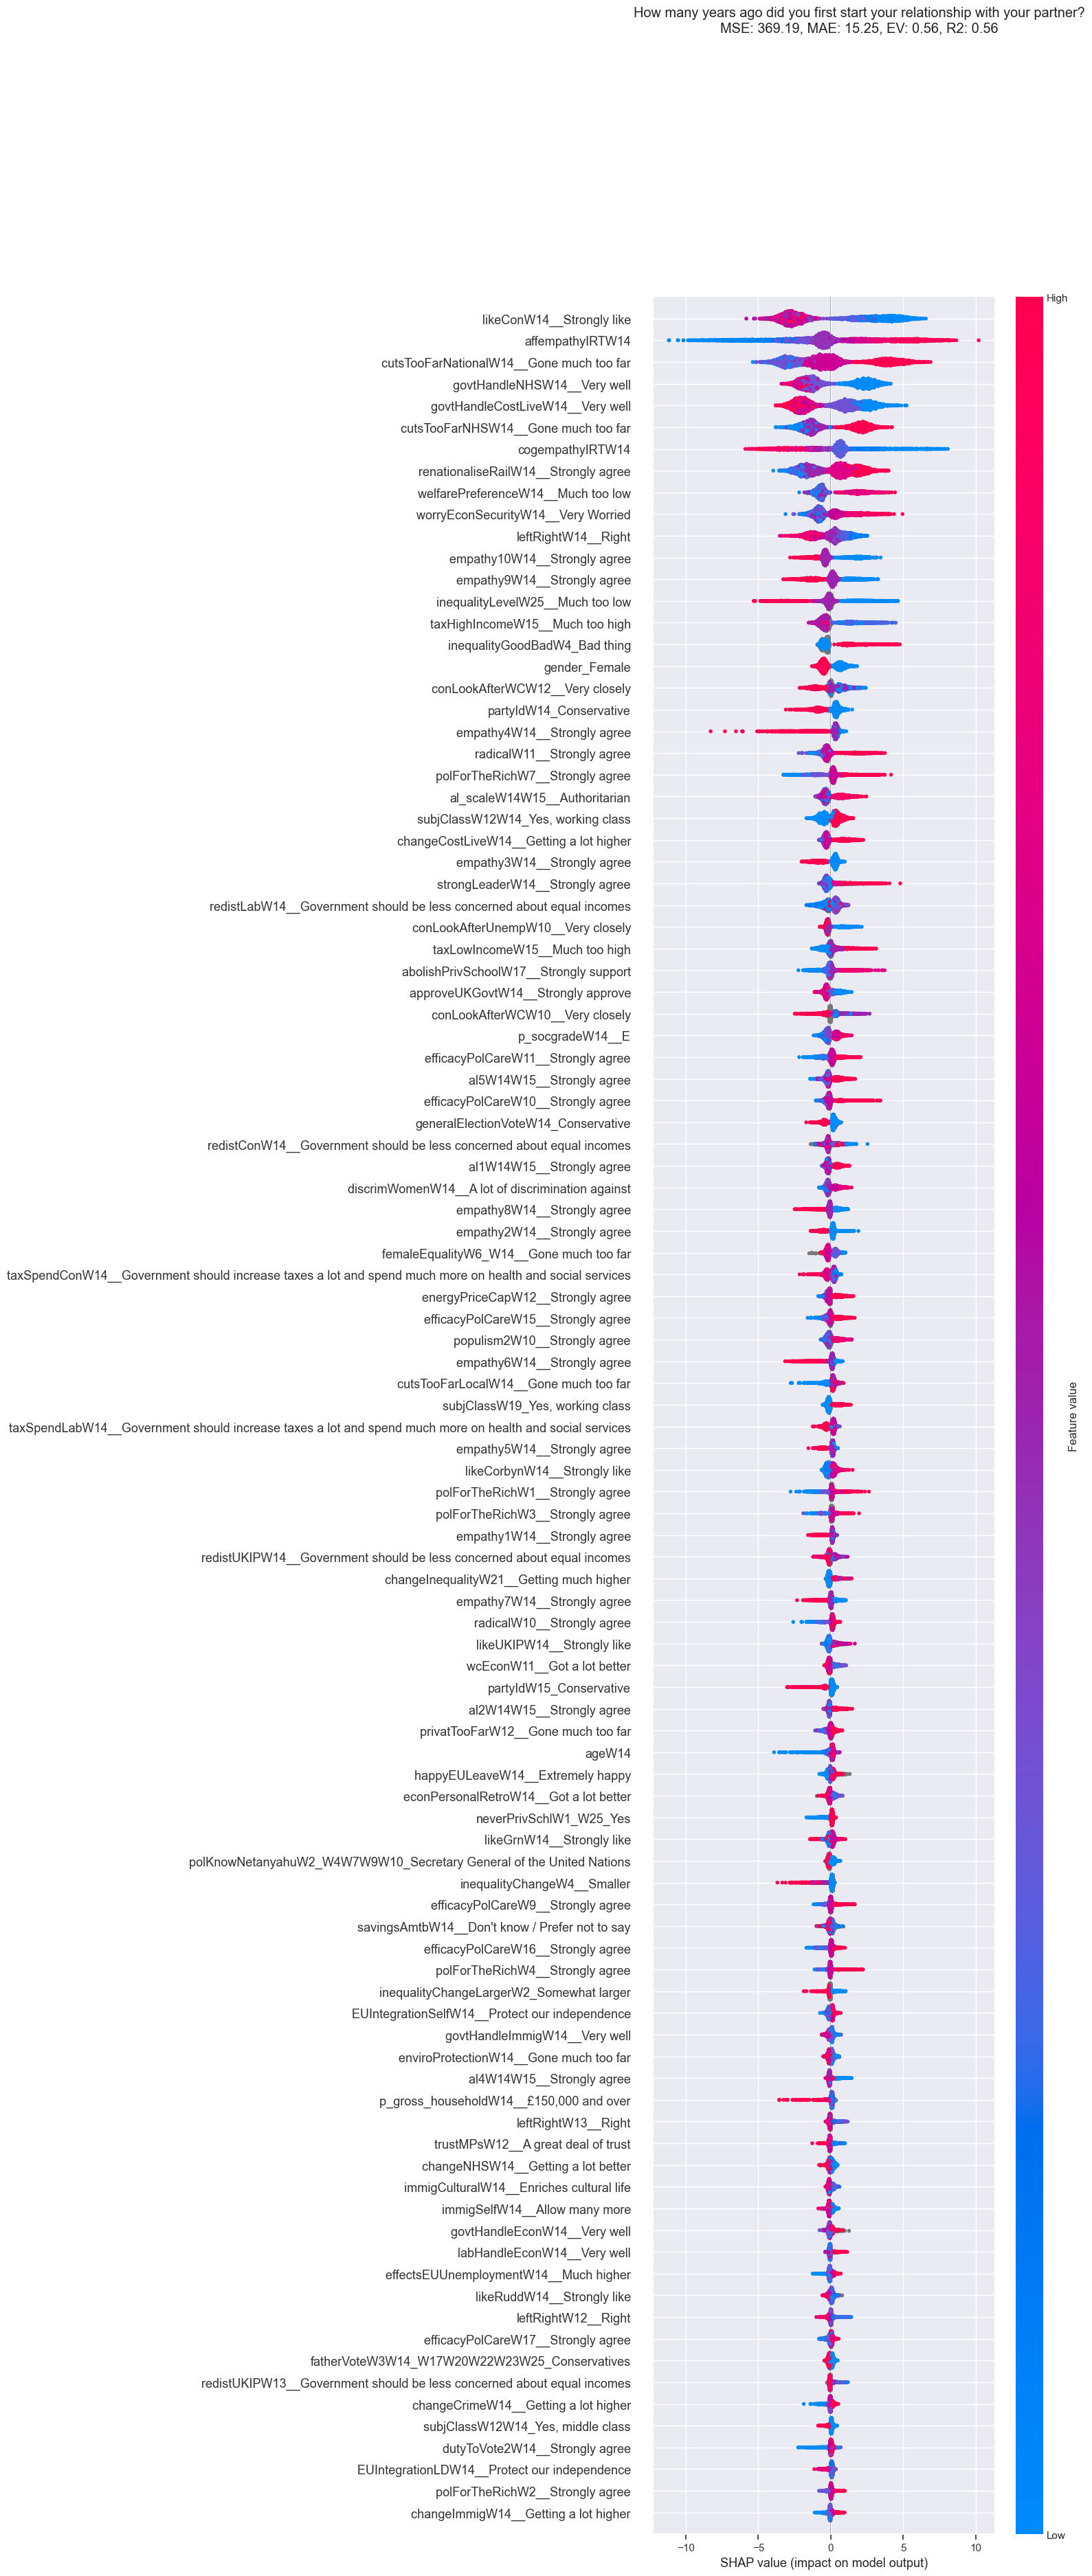

CPU times: total: 17min 18s
Wall time: 3min


In [14]:
%%time
name = "lr_scale_uniform"
BES_reduced_with_na[name] = lr_scale_uniform

# BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_reduced_with_na, name)
display_corr(df,name,corr_type).round(2)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",dataset=BES_reduced_with_na,
                                                    var_list = [name],
                                                    var_stub_list = [name,"lr_scale","lr1","lr2","lr3","lr4","lr5","redistSelf"],
                                                    verbosity=0)

#        'strongly_agreeable_normed_minus_al',

Top 20 positive (spearman) correlations for al_scale_uniform 
 
 
   
 r 
 p 
 N 
 
 
 
 
 al_scaleW14W15__Authoritarian 
 0.910000 
 0.00 
 4478 
 
 
 al1W14W15__Strongly agree 
 0.810000 
 0.00 
 4478 
 
 
 al5W14W15__Strongly agree 
 0.800000 
 0.00 
 4478 
 
 
 al_scaleW17_W19__Authoritarian 
 0.770000 
 0.00 
 2169 
 
 
 al3W14W15__Strongly agree 
 0.760000 
 0.00 
 4478 
 
 
 al2W14W15__Strongly agree 
 0.680000 
 0.00 
 4478 
 
 
 al5W17_W19__Strongly agree 
 0.660000 
 0.00 
 2278 
 
 
 al1W17_W19__Strongly agree 
 0.650000 
 0.00 
 2263 
 
 
 al2W7_W9__Strongly agree 
 0.630000 
 0.00 
 2660 
 
 
 al3W17_W19__Strongly agree 
 0.630000 
 0.00 
 2282 
 
 
 immigrantsWelfareStateW7__Strongly agree 
 0.590000 
 0.00 
 2161 
 
 
 overseasAidW12__Strongly agree 
 0.550000 
 0.00 
 501 
 
 
 dealPriorityImmigW15__Extremely important 
 0.530000 
 0.00 
 2767 
 
 
 euUndermineIdentityW7__Strongly agree 
 0.510000 
 0.00 
 2114 
 
 
 euParlOverRideW7__Strongly agree 
 0.510000 
 0.00 
 2109 
 
 
 euPriorityBalanceW13__Control immigration 
 0.510000 
 0.00 
 2659 
 
 
 govtHandoutsW20__Strongly agree 
 0.510000 
 0.00 
 1807 
 
 
 al4W14W15__Strongly agree 
 0.500000 
 0.00 
 4478 
 
 
 immigContributeTakeW7__Get more than they pay 
 0.500000 
 0.00 
 1891 
 
 
 dealPriorityRedTapeW15__Extremely important 
 0.490000 
 0.00 
 2729 
 
 
 

 
 Top 20 negative (spearman) correlations for al_scale_uniform 
 
 
   
 r 
 p 
 N 
 
 
 
 
 immigSelfW10__Allow many more 
 -0.550000 
 0.00 
 2343 
 
 
 immigEconW8__Good for economy 
 -0.530000 
 0.00 
 2375 
 
 
 asylumMoreW7__Many more 
 -0.520000 
 0.00 
 2125 
 
 
 immigCulturalW3__Enriches cultural life 
 -0.520000 
 0.00 
 1631 
 
 
 natSecuritySelfW13__Protect civil liberties 
 -0.490000 
 0.00 
 2646 
 
 
 paperLast3_10W18_Yes 
 -0.490000 
 0.00 
 1189 
 
 
 echrW7__Strongly agree 
 -0.480000 
 0.00 
 2116 
 
 
 immigrationLevelW4__Increased a lot 
 -0.470000 
 0.00 
 1804 
 
 
 euLawsLevelW7__Strongly agree 
 -0.460000 
 0.00 
 2105 
 
 
 immigExpDVW2__Strongly agree 
 -0.460000 
 0.00 
 977 
 
 
 euUKRichW8__Strongly agree 
 -0.450000 
 0.00 
 2326 
 
 
 euFinancialHelpW7__Strongly agree 
 -0.450000 
 0.00 
 2089 
 
 
 familiesMoreW8__Many more 
 -0.440000 
 0.00 
 2354 
 
 
 europeannessW9__Very strongly European 
 -0.430000 
 0.00 
 2345 
 
 
 likeSturgeonW17__Strongly like 
 -0.430000 
 0.00 
 2188 
 
 
 noneuMoreW7__Many more 
 -0.430000 
 0.00 
 2128 
 
 
 likeSNPW17__Strongly like 
 -0.430000 
 0.00 
 2069 
 
 
 approveEUW7__Strongly approve 
 -0.430000 
 0.00 
 2129 
 
 
 integrityCorbynW19__Complete integrity 
 -0.420000 
 0.00 
 2059 
 
 
 redistUKIPW3__Government should be less concerned[...] 
 -0.420000 
 0.00 
 1105

MSE: 339.18, MAE: 14.48, EV: 0.59, R2: 0.59


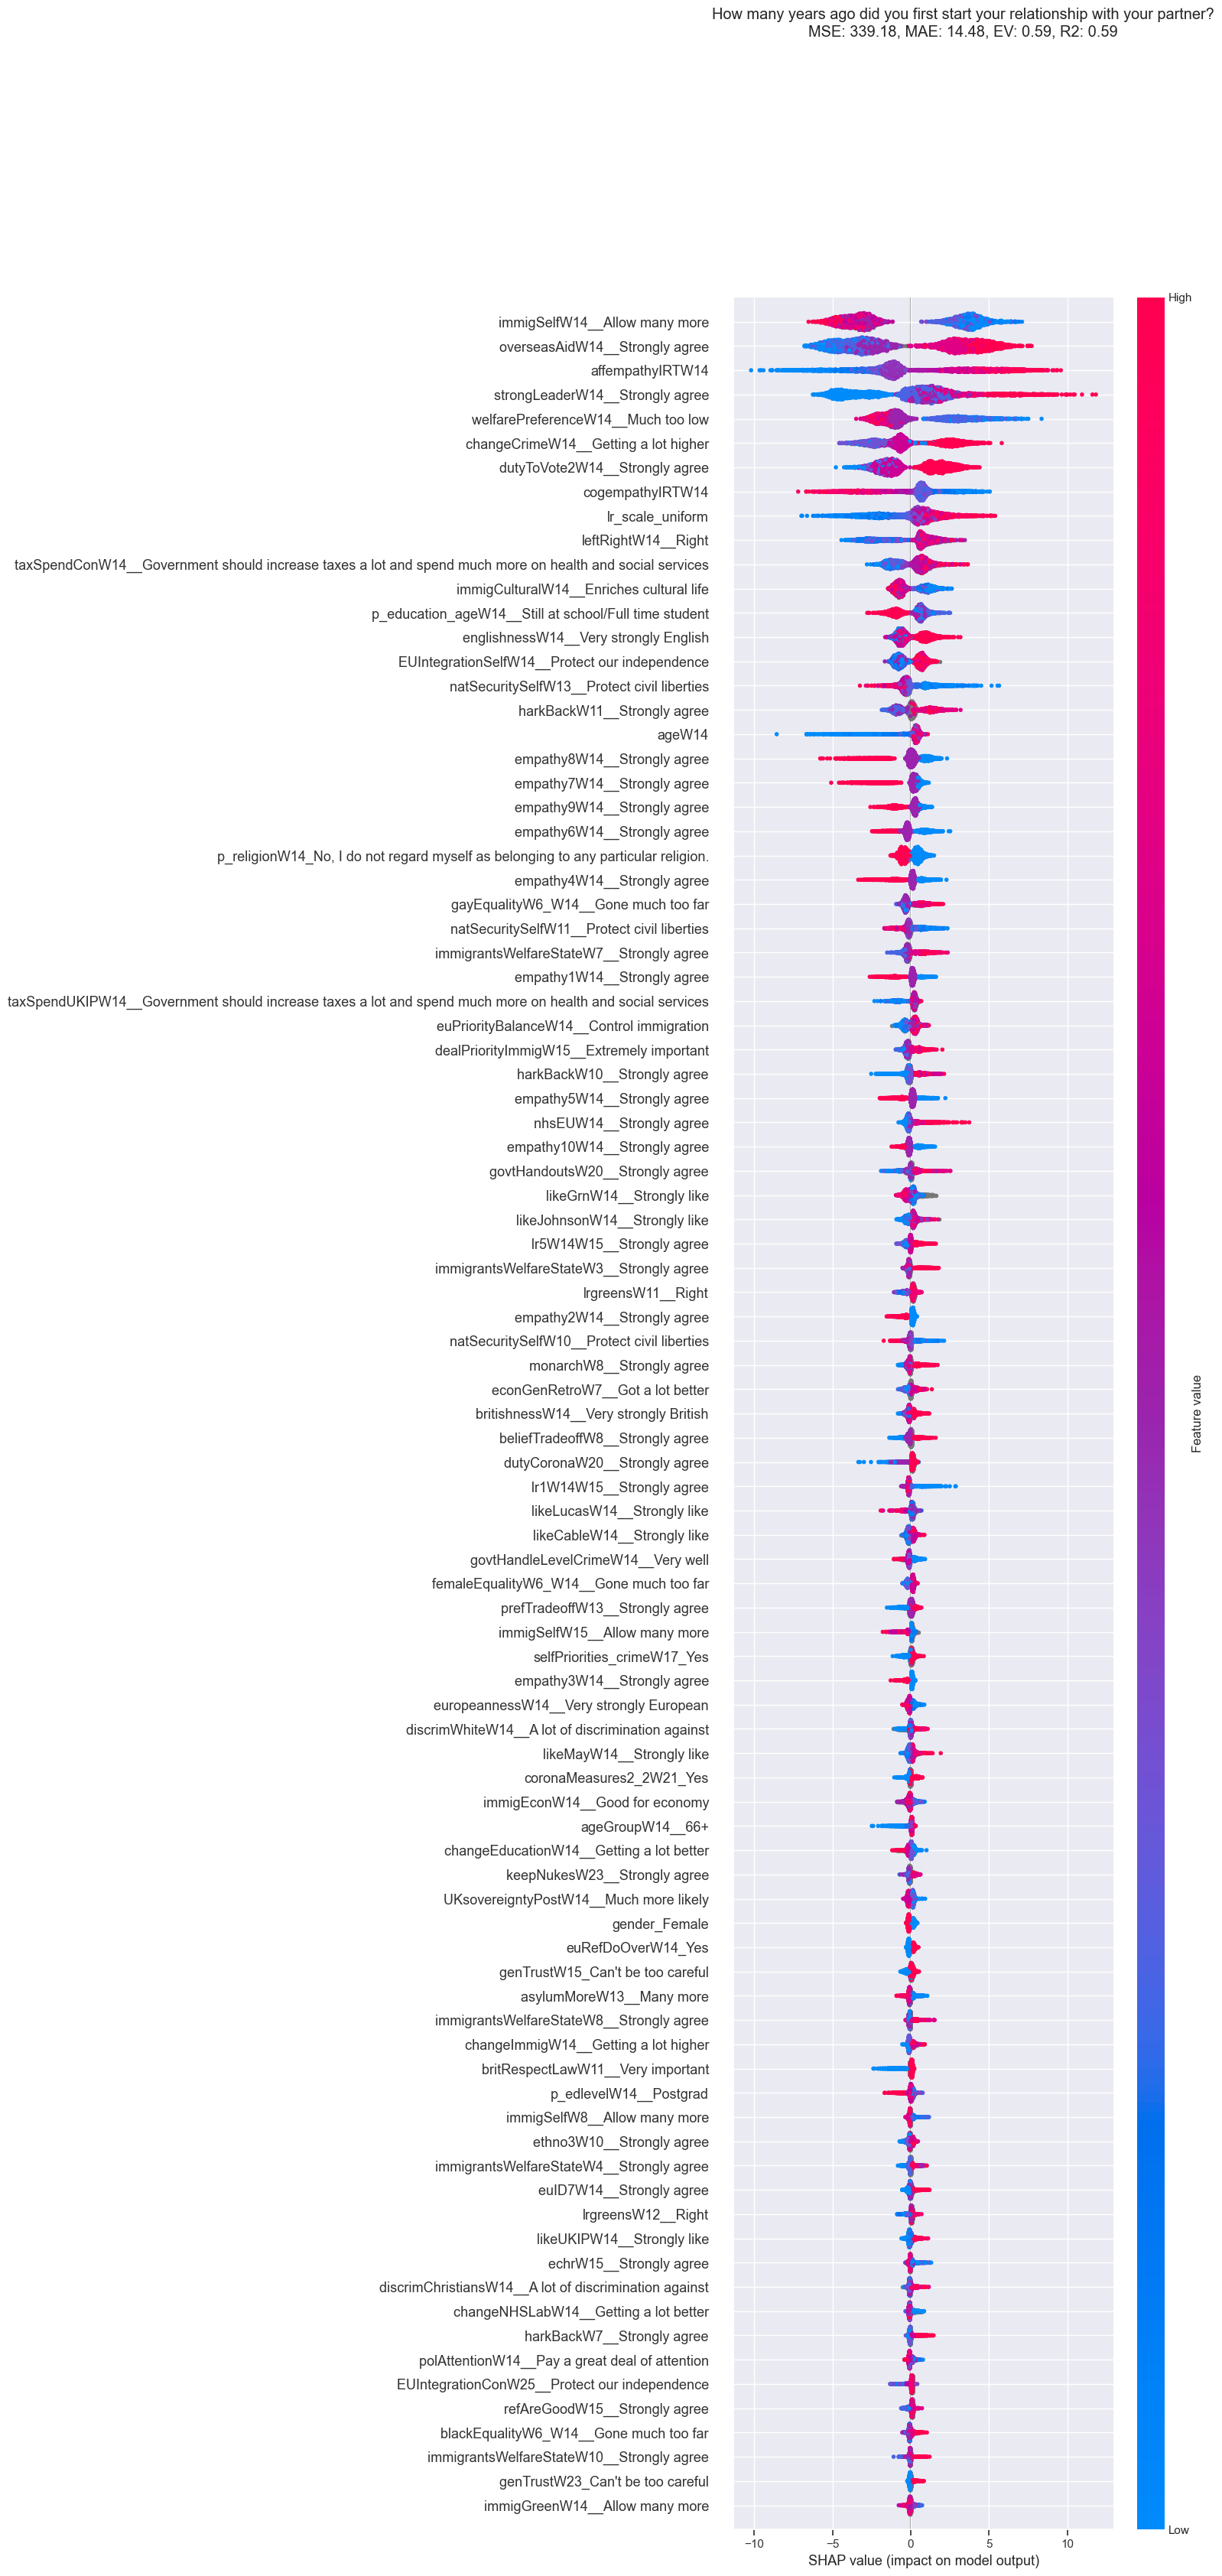

CPU times: total: 18min 35s
Wall time: 3min 3s


In [15]:
%%time
name = "al_scale_uniform"
BES_reduced_with_na[name] = al_scale_uniform

# BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_reduced_with_na, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",dataset=BES_reduced_with_na,
                                                    var_list = [name],
                                                    var_stub_list = [name,"al_scale","al1","al2","al3","al4","al5"],
                                                    verbosity=0)

#        'strongly_agreeable_normed_minus_al',